# <center> ACML Project- Sentiment Analysis of Twitter Data using Naive Bayes and Support Vector Machine </center>
## <center> Rylan Perumal - 1396469 </center>
## <center> School of Computer Science and Applied Mathematics </center>
<img src="../images/wits_logo.png" alt="drawing" width="300"/>

***

# Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import math
import random as rand
from collections import Counter
from itertools import chain
import nltk
from sklearn.model_selection import train_test_split

In [2]:
# reading in the pre-processed data
tweets = pd.read_csv('data/tweets_pre_processed_clean.csv')

In [3]:
tweets.head()

,text,tweet_no_punc,tweet_english,tweet_token,tweet,lang,class
0,Big ol freak just make you wann twerk 😂,Big ol freak just make you wann twerk,Big freak just make you,"['big', 'freak', 'just', 'make', 'you']","['big', 'freak', 'make']",en,1.0
1,The rain thought it was slick 😂 i got my umbre...,The rain thought it was slick i got my umbrell...,The rain thought it was slick i got my umbrell...,"['the', 'rain', 'thought', 'it', 'was', 'slick...","['rain', 'thought', 'slick', 'got', 'umbrella'...",en,1.0
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,I crack myself up dude,I crack myself up dude,"['i', 'crack', 'myself', 'up', 'dude']","['crack', 'dude']",en,1.0
3,BC I was feeling tf outta myself. 😌,BC I was feeling tf outta myself,I was feeling myself,"['i', 'was', 'feeling', 'myself']",['feeling'],en,1.0
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,Feeling ready to pop off Literally Joel Embiid...,Feeling ready to pop off Literally is really o...,"['feeling', 'ready', 'to', 'pop', 'off', 'lite...","['feeling', 'ready', 'pop', 'literally', 'real...",en,1.0


In [4]:
# tweets.tweet

In [5]:
def train_test(data):
    train_data, test_data = train_test_split(data, test_size=0.2)
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True) 
    train_extraction = train_data.tweet_token.apply(lambda x: tokenize_string(x))
    test_extraction = test_data.tweet_token.apply(lambda x: tokenize_string(x))
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    for i in range(train_extraction.shape[0]):
        array = train_extraction.iloc[i]
        remove_empty = [word for word in array if word == '']
        for word in remove_empty: array.remove(word)
        remove_word_less_len_3 = [word for word in array if len(word) < 3]
        for word in remove_word_less_len_3: array.remove(word)
        for j in range(len(array)): 
            array[j] = array[j].replace(" ", "")
        X_train.append(array)
        if(train_data['class'].iloc[i] == 0):
            Y_train.append(-1)
        else:
            Y_train.append(train_data['class'].iloc[i])
    
    for i in range(test_extraction.shape[0]):
        array = test_extraction.iloc[i]
        remove_empty = [word for word in array if word == '']
        for word in remove_empty: array.remove(word)
        remove_word_less_len_3 = [word for word in array if len(word) < 3]
        for word in remove_word_less_len_3: array.remove(word)
        for j in range(len(array)): 
            array[j] = array[j].replace(" ", "")
        X_test.append(array)
        if(test_data['class'].iloc[i] == 0):
            Y_test.append(-1)
        else:
            Y_test.append(test_data['class'].iloc[i])
    return X_train, Y_train, X_test, Y_test

In [6]:
def tokenize_string(text):
    text = str(text)
    text = text[1:]
#     text = re.sub("[", "", text)
    text = re.sub("]", "", text)
    text = re.sub("'", "", text)
    tokens = re.split(",", text)
    return tokens

In [7]:
def feature_extraction(dataset):
    # extracting words to build feature vector
    words = []
    for i in range(len(dataset)):
        words.extend(list(set(dataset[i])))
    word_dict = Counter(words)
    word_dict = dict.fromkeys(word_dict, 0)
    return word_dict

In [8]:
def svm(X, Y, word_dict, alpha=0.95, iterations=1000):
    # adding a bias term
#     word_dict['b'] = 0
    # training using sgd
    for i in range(1, iterations):
        for j, x in enumerate(X):
            val = 0
            for k in range(len(x)):
                # dot product
                if x[k] in word_dict.keys():
                    val += word_dict[x[k]]
            val *= Y[j]
            # misclassification
            if(val < 1):
                # updating our weights
                for k in range(len(x)):
                    if x[k] in word_dict.keys():
                        word_dict[x[k]] = word_dict[x[k]] + alpha + ((Y[j])) + (-2 * (1/i) * word_dict[x[k]])
            else:
                # correctly classified
                for k in range(len(x)):
                    if x[k] in word_dict.keys():
                        word_dict[x[k]] = word_dict[x[k]] + alpha + (-2 * (1/i) * word_dict[x[k]])
    return word_dict

In [9]:
def svm_notes(X, Y, word_dict, lamda=0.95, iterations=500):
    # adding a bias term
#     word_dict['b'] = 0
    # training using sgd
    for t in range(1, iterations):
        nt = 1 / (lamda*t)
        for j, x in enumerate(X):
            val = 0
            for k in range(len(x)):
                # dot product
                if x[k] in word_dict.keys():
                    val += word_dict[x[k]]
            val *= Y[j]
            # misclassification
            if(val < 1):
                # updating our weights
                for k in range(len(x)):
                    if x[k] in word_dict.keys():
                        word_dict[x[k]] = (1- nt*lamda)*word_dict[x[k]] + nt*Y[j]
#                         word_dict[x[k]] = word_dict[x[k]] + alpha + ((Y[j])) + (-2 * (1/i) * word_dict[x[k]])
            else:
                # correctly classified
                for k in range(len(x)):
                    if x[k] in word_dict.keys():
                        word_dict[x[k]] = (1-nt*lamda)*word_dict[x[k]]
#                         word_dict[x[k]] = word_dict[x[k]] + alpha + (-2 * (1/i) * word_dict[x[k]])
    return word_dict

In [10]:
def svm_classification(X, Y, weights):
    pos_p = 0
    pos_n = 0
    neg_p = 0
    neg_n = 0
    for i, x in enumerate(X):
        val = 0
#         print(i, x)
        for j in range(len(x)):
            # dot product
            if x[j] in weights.keys():
                val += weights[x[j]]
            val *= Y[i]
        if(val < 1):
            # incorrect
            if(Y[i] == -1):
                pos_n += 1 # predicted positive, actually negative
            else:
                neg_p += 1 # predictied negative, actually positive
        else:
            # correct
            if(Y[i] == 1):
                pos_p += 1 # predicted positive, actually positive
            else:
                neg_n += 1 # predicted negative, actually negative
    return pos_p, pos_n, neg_p, neg_n

In [11]:
def plot_confusion_matrix(pos_p, pos_n, neg_p, neg_n):
    cm = np.array([[pos_p, pos_n], [neg_p, neg_n]])
    fig, ax = plt.subplots()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    plt.xlabel('Class')
    plt.ylabel('Prediction')
    target_names = ['Positive', 'Negative']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=0)
    plt.yticks(tick_marks, target_names)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')
    plt.savefig('../svm_confusion')

In [12]:
def run_multiple(tweets, runs=2, training=False, supressed_output=False):
    accuracy_array = []
    precision_t_array = []
    precision_n_array = []
    precision_array = []
    recall_array = []
    recall_array_t = []
    recall_array_n = []
    f1_score_array = []
    f1_score_array_t = []    
    f1_score_array_n = []
    for i in np.arange(1, runs):
        # shuffling the dataframe so that we do not get a biased training sample
        tweets = tweets.reindex(np.random.permutation(tweets.index))
        tweets.reset_index(drop=True)
        X_train, Y_train, X_test, Y_test = train_test(tweets)
        word_dict = feature_extraction(X_train)
#         print('Training ... ')
        learned_weights = svm(X_train, Y_train, word_dict)
#         print('Training Done ... ')
#         print('-----------------------------------------')
        if training:
            pos_p, pos_n, neg_p, neg_n = svm_classification(X_train, Y_train, learned_weights)
        else:
            pos_p, pos_n, neg_p, neg_n = svm_classification(X_test, Y_test, learned_weights)
        if supressed_output:
            plot_confusion_matrix(pos_p, pos_n, neg_p, neg_n)
        accuracy = (pos_p + neg_n) / (pos_p + pos_n + neg_n + neg_p)
        precision_t = pos_p / (pos_p + pos_n)
        precision_n = neg_n / (neg_n + neg_p)
        recall_t = pos_p / (pos_p + neg_p)
        recall_n = neg_n / (neg_n + pos_n)
        f1_score_t = 2*((precision_t*recall_t)/(precision_t + recall_t))
        f1_score_n = 2*((precision_n*recall_n)/(precision_n + recall_n))
        accuracy_array.append(accuracy)
        precision_t_array.append(precision_t)
        precision_n_array.append(precision_n)
        recall_array_t.append(recall_t)
        recall_array_n.append(recall_n)
        f1_score_array_t.append(f1_score_t)
        f1_score_array_n.append(f1_score_n)
    precision_array.append(precision_t_array)
    precision_array.append(precision_n_array)
    recall_array.append(recall_array_t)
    recall_array.append(recall_array_n)
    f1_score_array.append(f1_score_array_t)
    f1_score_array.append(f1_score_array_n)
    return accuracy_array, precision_array, recall_array, f1_score_array

Testing Accuracy = 60.94%
Testing Precision positive = 55.92%
Testing Precision negative = 85.20%
Testing Recall positive = 94.81%
Testing Recall negative = 28.58%
Testing F1 Score positive = 70.34%
Testing F1 Score negative = 42.80%
-------------------------------------------------------------
Training Accuracy = 62.08%
Training Precision positive = 56.43%
Training Precision negative = 88.56%
Training Recall positive = 95.86%
Training Recall negative = 30.25%
Training F1 Score positive = 71.04%
Training F1 Score negative = 45.09%


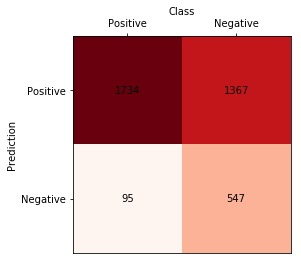

In [13]:
accuracy_array_train, precision_array_train, recall_array_train, f1_score_array_train = run_multiple(tweets, training=True)
accuracy_array_test, precision_array_test, recall_array_test, f1_score_array_test = run_multiple(tweets, supressed_output=True)

avg_accuracy_test = sum(accuracy_array_test) / len(accuracy_array_test)
avg_precision_test_t = sum(precision_array_test[0]) / len(precision_array_test[0])
avg_precision_test_n = sum(precision_array_test[1]) / len(precision_array_test[1])
avg_recall_test_t = sum(recall_array_test[0]) / len(recall_array_test[0])
avg_recall_test_n = sum(recall_array_test[1]) / len(recall_array_test[1])
avg_f1_score_test_t = sum(f1_score_array_test[0]) / len(f1_score_array_test[0])
avg_f1_score_test_n = sum(f1_score_array_test[1]) / len(f1_score_array_test[1])

avg_accuracy_train = sum(accuracy_array_train) / len(accuracy_array_train)
avg_precision_train_t = sum(precision_array_train[0]) / len(precision_array_train[0])
avg_precision_train_n = sum(precision_array_train[1]) / len(precision_array_train[1])
avg_recall_train_t = sum(recall_array_train[0]) / len(recall_array_train[0])
avg_recall_train_n = sum(recall_array_train[1]) / len(recall_array_train[1])
avg_f1_score_train_t = sum(f1_score_array_train[0]) / len(f1_score_array_train[0])
avg_f1_score_train_n = sum(f1_score_array_train[1]) / len(f1_score_array_train[1])

print('Testing Accuracy = {:>2.2f}%'.format(avg_accuracy_test*100))
print('Testing Precision positive = {:>2.2f}%'.format(avg_precision_test_t*100))
print('Testing Precision negative = {:>2.2f}%'.format(avg_precision_test_n*100))
print('Testing Recall positive = {:>2.2f}%'.format(avg_recall_test_t*100))
print('Testing Recall negative = {:>2.2f}%'.format(avg_recall_test_n*100))
print('Testing F1 Score positive = {:>2.2f}%'.format(avg_f1_score_test_t*100))
print('Testing F1 Score negative = {:>2.2f}%'.format(avg_f1_score_test_n*100))
print('-------------------------------------------------------------')
print('Training Accuracy = {:>2.2f}%'.format(avg_accuracy_train*100))
print('Training Precision positive = {:>2.2f}%'.format(avg_precision_train_t*100))
print('Training Precision negative = {:>2.2f}%'.format(avg_precision_train_n*100))
print('Training Recall positive = {:>2.2f}%'.format(avg_recall_train_t*100))
print('Training Recall negative = {:>2.2f}%'.format(avg_recall_train_n*100))
print('Training F1 Score positive = {:>2.2f}%'.format(avg_f1_score_train_t*100))
print('Training F1 Score negative = {:>2.2f}%'.format(avg_f1_score_train_n*100))